<div style="width:100%;text-align: center;"> <img align=middle src="https://images.unsplash.com/photo-1611162616305-c69b3fa7fbe0?ixlib=rb-1.2.1&ixid=MnwxMjA3fDB8MHxzZWFyY2h8Mnx8aW5zdGFncmFtfGVufDB8fDB8fA%3D%3D&auto=format&fit=crop&w=500&q=60" alt="Heat beating" style="height:366px;margin-top:3rem;"> </div>



# <h1 style='background:#C13584; border:0; color:white'><center>EDA:Top Instagram Influencers Data</center></h1> 

# **<span style="color:#cd486b;">📰About the Dataset</span>**

Instagram is an American photo and video sharing social networking service founded in 2010 by Kevin Systrom and Mike Krieger, and later acquired by Facebook Inc.. The app allows users to upload media that can be edited with filters and organized by hashtags and geographical tagging. Posts can be shared publicly or with preapproved followers. Users can browse other users' content by tag and location, view trending content, like photos, and follow other users to add their content to a personal feed.

Instagram network is very much used to influence people (the users followers) in a particular way for a specific issue - which can impact the order in some ways.


# **<span style="color:#cd486b;">📁About the files</span>**
**The dataset has in total of 7 columns**

> Rank - Rank of the Influencer

> Channel Info - Username of the user

> Influence score - Influence score of the users

> Posts - Number of posts they have done so far

> Followers - Number of followers of the user.

> Total Likes - Total likes the user has got on their posts. (in Billion)

> Country or Region - Country of origin of the user.

In [ ]:
import seaborn as sns

#Custom Colors
class clr:
    S = '\033[1m' + '\033[96m'
    E = '\033[0m'
    
my_colors = ["#8a3ab9", "#e95950", "#bc2a8d", "#fccc63", "#fbad50", "#cd486b", "#4c68d7"]

print(clr.S + "Notebook Color Scheme: " + clr.E)
sns.palplot(sns.color_palette(my_colors))


In [ ]:
#Imports
!pip install imagesize
import imagesize
from IPython.display import display_html
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as patches
import random
import sys

In [ ]:
#Environment check

import os
import wandb
import warnings

warnings.filterwarnings("ignore")
os.environ["WANDB_SILENT"] = "true"
CONFIG = {'Dataset': 'influencer-dataset', '_wandb_kernel': 'aot'}

#wandb.init(project='influencer-dataset')

<center><img src="https://camo.githubusercontent.com/dd842f7b0be57140e68b2ab9cb007992acd131c48284eaf6b1aca758bfea358b/68747470733a2f2f692e696d6775722e636f6d2f52557469567a482e706e67"></center>

In [ ]:
#Let's setup WandB 

from kaggle_secrets import UserSecretsClient
user_secrets = UserSecretsClient()
secret_value_0 = user_secrets.get_secret("secret_label")

!wandb login 


# **<span style="color:#cd486b;">🔽 Helper Functions</span>**
***This code snippet has been contributed by Andrada Olteanu***

In [ ]:
def show_values_on_bars(axs, h_v = "v", space = 0.4):
    #axs = ax of plot, h_v = whether or not barplot is horizontal / vertical
    
    def _show_on_single_plot(ax):
        if h_v == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width()/ 2
                _y = p.get_y() + p.get_height()
                value = int(p.get_height())
                ax.text(_x, _y, format(value, ','), ha = "center")
        elif h_v == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() +float(space)
                _y = p.get_y() + p.get_height()
                value = int(p.get_width())
                ax.text(_x, _y, format(value, ','), ha = "left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _show_on_single_plot(ax)
    else:
        _show_on_single_plot(axs)
        
        
# === 🐝 W&B ===
def save_dataset_artifact(run_name, artifact_name, path):
    '''Saves dataset to W&B Artifactory.
    run_name: name of the experiment
    artifact_name: under what name should the dataset be stored
    path: path to the dataset'''
    
    run = wandb.init(project='happywhale', 
                     name=run_name, 
                     config=CONFIG)
    artifact = wandb.Artifact(name=artifact_name, 
                              type='dataset')
    artifact.add_file(path)

    wandb.log_artifact(artifact)
    wandb.finish()
    print("Artifact has been saved successfully.")
    
def create_wandb_plot(x_data=None, y_data=None, x_name=None, y_name=None, title=None, log=None, plot="line"):
    '''Create and save lineplot/barplot in W&B Environment.
    x_data & y_data: Pandas Series containing x & y data
    x_name & y_name: strings containing axis names
    title: title of the graph
    log: string containing name of log'''
    
    data = [[label, val] for (label, val) in zip(x_data, y_data)]
    table = wandb.Table(data=data, columns = [x_name, y_name])
    
    if plot == "line":
        wandb.log({log : wandb.plot.line(table, x_name, y_name, title=title)})
    elif plot == "bar":
        wandb.log({log : wandb.plot.bar(table, x_name, y_name, title=title)})
    elif plot == "scatter":
        wandb.log({log : wandb.plot.scatter(table, x_name, y_name, title=title)})
        
        
def create_wandb_hist(x_data=None, x_name=None, title=None, log=None):
    '''Create and save histogram in W&B Environment.
    x_data: Pandas Series containing x values
    x_name: strings containing axis name
    title: title of the graph
    log: string containing name of log'''
    
    data = [[x] for x in x_data]
    table = wandb.Table(data=data, columns=[x_name])
    wandb.log({log : wandb.plot.histogram(table, x_name, title=title)})
    

In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [ ]:
df = pd.read_csv('/kaggle/input/top-instagram-influencers-data-cleaned/Top Instagram Influencers data (Cleaned).csv')

In [ ]:
df.head()

In [ ]:
df.columns

In [ ]:
df.rename(columns = {'Channel Info': 'Channel_Info','Influence score ': 'Influence_score', 'Total Likes': 'Total_Likes', 'Country or Region ': 'Country'}, inplace = True)

In [ ]:
df.columns

In [ ]:
print(type(df['Posts ']))

In [ ]:
# WANDB Run 🐝
run = wandb.init(project = 'influencer-dataset', name = 'InfluencerDataset', config = CONFIG )

# **<span style="color:#cd486b;">🥽Let's see what all we can explore in this dataset</span>**

> 1. Relation between all parameters

> 2. Which influencer has the highest Influence score - a representation

> 3. Who has maximum followers?

> 4. Which influencers content is most and least liked by the audience? (in Billion)

> 5. Relation between influencers (Channel Info) and Country or region

> 6. Which influencer makes maximum posts on IG - a representation

> 7. Which celeb earns the most? considering they charge min Rs. 1 lakh per post. (TBD)

# **<span style="color:#e95950;">🤝 Correlation Between all parameters</span>**

In [ ]:
plt.figure(figsize = (25, 12), facecolor = "#F7F4F4")
sns.heatmap(df.corr(), annot = True, cmap = "magma");

 **<span style="color:#bc2a8d;">From the above heatmap, we found that Number of followers is most likely to be related to total likes and influence score</span>**

In [ ]:
import matplotlib.pyplot as plt

#Logging first plot in WandB
df.plot(x='Channel_Info', y='Followers ', kind="hist", figsize=(15, 8), color = '#bc2a8d')
plt.legend()
wandb.log({"plot": plt})

In [ ]:
#data = [[influencers, followers] for (influencers, followers) in zip(df['Channel_Info'], df['Followers '])]
#table = wandb.Table(data=data, columns = ['Channel_Info', 'Followers '])
#wandb.log({'influencer-dataset' : wandb.plot.bar(table, 'influencers', 'followers')})

In [ ]:
#Let's plot some columns

rank_of_influencers = df['Rank ']
followers = df['Followers ']

fig, ax1 = plt.subplots(1, figsize = (20, 10))
axs = ax1
sns.histplot(data = followers.head(20), x =df['Followers '], ax = ax1, color = my_colors[1])

show_values_on_bars(ax2, h_v = 'v', space = 0.4)
sns.despine(left = True, bottom = True)
plt.subplots_adjust(left = None, bottom = None, right = None, top = 0.86, wspace = 0.3, hspace = None)


In [ ]:
#Log plots in wandb 🐝

create_wandb_plot(x_data = influencers.head(30),
                 y_data = followers.head(30),
                 x_name = "Influencers", y_name = 'follower_count',
                 title = "Influencers and their followers",
                 log = "influencer_vs_followers", plot = "bar")

create_wandb_hist(x_data = influencers.head(30),
                 x_name = "Influencers",
                 title = "Top 30 influencers",
                 log = "hist1")


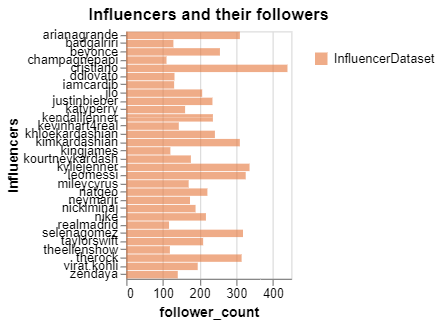

In [ ]:
maximum_posts = df['Posts '].value_counts()
maximum_posts

# **<span style="color:#e95950;">🔥Which Influencer has maximum posts</span>**

In [ ]:
#Which influencer has maximum posts

maximum_posts = df['Posts '].value_counts()
#max_post_influencer = df.loc[df['Posts '] == maximum_posts, 'Channel_Info'].iloc[0]

create_wandb_plot(x_data = influencers.head(30),
                 y_data = maximum_posts.head(30),
                 x_name = "Influencers", y_name = 'Posts made',
                 title = "Posts per influencer",
                 log = "influencer_vs_post", plot = "bar")


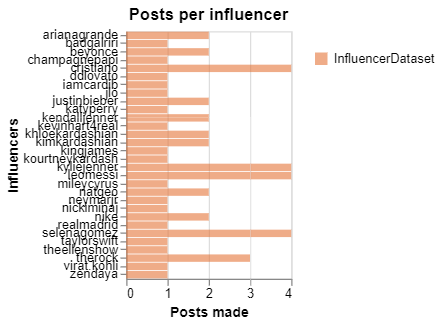

# **<span style="color:#e95950;">🤝 Relation Between Influencers vs No. of likes they got</span>**

In [ ]:
#Influencers vs number of likes

create_wandb_plot(x_data = influencers.head(20),
                 y_data = df['Total_Likes'],
                 x_name = "Influencers top 20", y_name = 'Number of likes (in Billion)',
                 title = "Likes per influencer",
                 log = "influencer_vs_likes", plot = "bar")


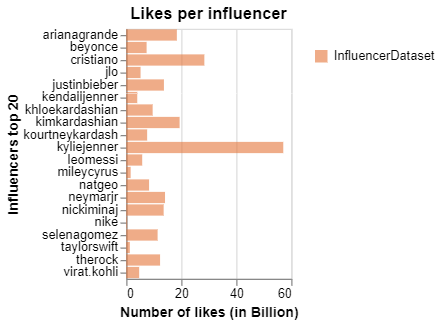


# **<span style="color:#e95950;">🤝 Relation Between Influencer score vs followers</span>**

In [ ]:
sns.set_theme(style = "whitegrid")

g = sns.JointGrid(data = df, size = 7, height = 5, x = 'Influence_score', y = 'Followers ', space = 0.5)
g.plot_joint(sns.kdeplot, fill = False, thresh = 0, cmap = "plasma")
g.plot_marginals(sns.histplot,kde = True,  color = my_colors[4], alpha = 1, bins = 30);


In [ ]:
sns.set_theme(style = "whitegrid")

g = sns.JointGrid(data = df, size = 7, height = 5, x = 'Influence_score', y = 'Followers ', space = 0.5)
g.plot(sns.scatterplot, sns.histplot, color = my_colors[5])

In [ ]:
sns.catplot(x = 'Influence_score',
            y = 'Followers ',
            kind = "strip",
            height = 7,
            aspect = 2,
            color = my_colors[0],
            data = df).set(title = "Influence Score vs Number of Followers");


 **<span style="color:#bc2a8d;">Above charts mark that the more the influence score the more will be the number of followers</span>**

# **<span style="color:#e95950;">🌟Which country has most influencers</span>**

In [ ]:
#find which country has maximum influencers
top_countries = []
values = []

for countries, val in df['Country'].value_counts().iteritems():
    top_countries.append(countries)
    values.append(val)

df1 = pd.DataFrame({'top_countries':top_countries,'values': values})

df1.plot(x='top_countries',kind = 'bar', figsize=(15, 8), color = my_colors[0])
plt.show()  



In [ ]:
wandb.finish()

# **<span style="color:#cd486b;">🤘Conclusion</span>**

> **<span style="color:#bc2a8d;">United States has maximum number of Influencers and celebraties on Instagram.</span>** 

> **<span style="color:#bc2a8d;">The influence score is directly propotional to the number of followers.</span>** 

> **<span style="color:#bc2a8d;">Also, number of likes are also propotional to number of followers.</span>** 

> **<span style="color:#bc2a8d;">Kylie Jenner, Ronaldo, Messi and the Rock are few of the influencers who made maximum posts.</span>** 

> **<span style="color:#bc2a8d;">Ronaldo has maximum number of followers as on record.</span>** 

**<span style="color:#bc2a8d;">So, if you are looking to be influencial on Instagram - Make your content relatable to followers and most importantly Useful for everyone.</span>**

**<span style="color:#000000;">#This marks the end of Version 1 of EDA: Top-Instagram-Influencers-with-WandB </span>** 

**<span style="color:#000000;"> Stay Tuned for next version </span>** 

**<span style="color:#000000;">Please share your feedback and suggestions and help me improve 😇 </span>** 